# Moscow city building properties analysis and metro stations closeness


In [72]:
#!pip3 install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import urllib.request
import csv
import json

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize

In [73]:
from geopy.geocoders import Nominatim
import folium 

#address = 'Chicago, USA'
address = 'Moscow, RUS'

geolocator = Nominatim(user_agent="my-app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of city are 55.7504461, 37.6174943.


In [74]:
# @hidden_cell
CLIENT_ID = 'ACZJOECQKRZ2W0XWIZRIOUW4YGI3030QJWHVTMVZZKLH0AMN' # your Foursquare ID
CLIENT_SECRET = 'E50W0Y52T0RTMTAQDUSMW02AFR5YANAIQIUKEY2PAGY4XP4K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [75]:
radius = 15000
n_results = 500
# Theater
#cat_id = '4bf58dd8d48988d137941735'
# Metro station
cat_id = '4bf58dd8d48988d1fd931735'

# beer house
url = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4bf58dd8d48988d137941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    #url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    cat_id,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    n_results)
print(url)

https://api.foursquare.com/v2/venues/search?&categoryId=4bf58dd8d48988d1fd931735&client_id=ACZJOECQKRZ2W0XWIZRIOUW4YGI3030QJWHVTMVZZKLH0AMN&client_secret=E50W0Y52T0RTMTAQDUSMW02AFR5YANAIQIUKEY2PAGY4XP4K&v=20180605&ll=55.7504461,37.6174943&radius=15000&limit=500


In [76]:
results = requests.get(url).json()

In [77]:
results['response']['venues']
venues = json_normalize(results['response']['venues'])
type(venues)
venues.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


(50, 18)

In [7]:
print(venues.columns)
filtered_columns = ['name', 'location.lat', 'location.lng']
venues = venues.loc[:, filtered_columns]

Index(['id', 'name', 'categories', 'referralId', 'hasPerk', 'location.address',
       'location.crossStreet', 'location.lat', 'location.lng',
       'location.labeledLatLngs', 'location.distance', 'location.postalCode',
       'location.cc', 'location.neighborhood', 'location.city',
       'location.state', 'location.country', 'location.formattedAddress'],
      dtype='object')


In [8]:
# clean columns
venues.columns = [col.split(".")[-1] for col in venues.columns]

venues.shape

(50, 3)

In [9]:
venues.tail(100)

,name,lat,lng
0,metro Kitay-gorod (Метро Китай-город),55.755196,37.633110
1,metro Park Pobedy (Метро Парк Победы),55.737146,37.515340
2,"metro Kiyevskaya, line 5 (Метро Киевская, коль...",55.743576,37.566194
3,"metro Komsomolskaya, line 5 (Метро Комсомольск...",55.775596,37.654834
4,metro Ploshchad Ilyicha (Метро Площадь Ильича),55.747179,37.681648
5,"metro Taganskaya, line 5 (Метро Таганская, кол...",55.742171,37.653771
6,metro Rimskaya (Метро Римская),55.746339,37.681594
7,metro Proletarskaya (Метро Пролетарская),55.731690,37.664911
8,metro Tsvetnoy Bulvar (Метро Цветной бульвар),55.771525,37.620784
9,metro Sokolniki (Метро Сокольники),55.789241,37.680353


In [10]:
# create map of New York using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for i, lat, lng, name in zip(venues.index, venues['lat'], venues['lng'], venues['name']):
    label = '{}: {}'.format(i, name.split('(')[0])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Find and preprocess a list of houses under construction

In [11]:
flats = pd.read_json('data-24713-2020-06-04.json', encoding = "Windows-1251") #"ISO-8859-1")
flats.shape

(1579, 25)

In [12]:
flats.head()
filtered_columns = ['global_id', 'Coordinates', 'MainFunctional', 'AdmArea']
flats = flats.loc[:, filtered_columns]

In [13]:
df_clean = flats
#[flats['MainFunctional']=='Дом']
# Reindex
#df_clean.reset_index(drop=True, inplace=True)

In [14]:
df_clean = df_clean[df_clean.apply(lambda row: row.astype(str).str.contains('Зеленоград').any() == False, axis=1)]
df_clean

,global_id,Coordinates,MainFunctional,AdmArea
0,272715485,"37.693324502046,55.797677127859",Подземная стоянка,[Восточный административный округ]
1,272715489,"37.489798795354,55.626083209178",Храм,[Юго-Западный административный округ]
2,272715492,"37.569607151073,55.685225196907",Офисное здание,[Юго-Западный административный округ]
3,272715504,"37.741970758303,55.690432838423","Объект аварийно-спасательной службы, формирования",[Юго-Восточный административный округ]
4,272715510,"37.595682531523,55.771000504538",Гостиница,[Центральный административный округ]
...,...,...,...,...
1574,1037819557,"37.884342235382,55.724229565696",Объект торговли иного типа,[Северо-Восточный административный округ]
1575,1037819558,"37.699581107495,55.697021718182",Больница,"[Северный административный округ, Юго-Восточны..."
1576,1037862689,"37.474834237220,55.859468813591",Многоэтажный многоквартирный дом,[Северный административный округ]
1577,1037862798,"37.474834237220,55.859468813591",Многоэтажный многоквартирный дом,[Северный административный округ]


In [15]:
df_clean = df_clean[df_clean.apply(lambda row: row.astype(str).str.contains('Многоэтажный многоквартирный дом').any(), axis=1)]
df_clean.reset_index(drop=True, inplace=True)

In [16]:
df_clean

,global_id,Coordinates,MainFunctional,AdmArea
0,272726711,"37.795564262836,55.761349247059",Многоэтажный многоквартирный дом,[Восточный административный округ]
1,272726777,"37.662497752668,55.606339142276",Многоэтажный многоквартирный дом,[Южный административный округ]
2,272726846,"37.677879903019,55.642152231422",Многоэтажный многоквартирный дом,[Южный административный округ]
3,272726887,"37.500611345616,55.801860524702",Многоэтажный многоквартирный дом,[Северный административный округ]
4,272726890,"37.561879230614,55.879979804897",Многоэтажный многоквартирный дом,[Северный административный округ]
...,...,...,...,...
448,1035998832,"37.609481885433,55.673467591528",Многоэтажный многоквартирный дом,[Южный административный округ]
449,1037160508,"37.539289973813,55.840327725186",Многоэтажный многоквартирный дом,[Северный административный округ]
450,1037862689,"37.474834237220,55.859468813591",Многоэтажный многоквартирный дом,[Северный административный округ]
451,1037862798,"37.474834237220,55.859468813591",Многоэтажный многоквартирный дом,[Северный административный округ]


In [17]:
#df_clean[['lat','lng']] = pd.DataFrame(df_clean['Coordinates'].astype(str).str.split(expand=True), index = df_clean.index)


df_clean[['lng','lat']] = df_clean['Coordinates'].astype(str).str.split(",", expand=True)
df_clean.drop(['Coordinates'], axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
df_clean2 = df_clean

In [19]:
# create map of New York using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, gid in zip(df_clean['lat'], df_clean['lng'], df_clean['global_id']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
    
# add markers to map
for lat, lng, name in zip(venues['lat'], venues['lng'], venues['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)      
    
map

### Create an array of initial centers

In [20]:
centers = np.array(venues[['lat','lng']])
centers.shape

(50, 2)

In [35]:
from sklearn.cluster import KMeans
kclusters = 50
km = KMeans(n_clusters=kclusters, init=centers, max_iter=100, n_init=1, verbose=1)
km.fit(df_clean[['lat','lng']])

Initialization complete
Iteration 0, inertia 0.5927100713536174
Iteration 1, inertia 0.20571571474782216
Iteration 2, inertia 0.1639615562872975
Iteration 3, inertia 0.1494543039738734
Iteration 4, inertia 0.137753597979588
Iteration 5, inertia 0.13403567260595678
Iteration 6, inertia 0.13264023664364172
Iteration 7, inertia 0.131717375057557
Iteration 8, inertia 0.13086127411062912
Iteration 9, inertia 0.1303146818186013
Iteration 10, inertia 0.13018813748053681
Iteration 11, inertia 0.1300847208997707
Iteration 12, inertia 0.1299586826490822
Iteration 13, inertia 0.12971115613942505
Iteration 14, inertia 0.12960449689522138
Converged at iteration 14: center shift 0.0 within tolerance 1.1735382298696006e-06


KMeans(init=array([[55.755196  , 37.63311   ],
       [55.73714575, 37.5153401 ],
       [55.74357583, 37.56619443],
       [55.775596  , 37.654834  ],
       [55.74717935, 37.68164804],
       [55.7421714 , 37.6537708 ],
       [55.74633873, 37.68159376],
       [55.73169041, 37.66491138],
       [55.77152462, 37.62078425],
       [55.78924086, 37.68035333],
       [55.768659  , 37.64922   ],
       [55.77530925, 37.58266216],
       [55.77712194, 37.58249817],
       [55.731724...
       [55.7395418 , 37.48380543],
       [55.70759629, 37.58614898],
       [55.75259792, 37.41253903],
       [55.86064619, 37.4363637 ],
       [55.84376047, 37.57010719],
       [55.86965942, 37.66351906],
       [55.78607   , 37.533257  ],
       [55.729828  , 37.472171  ],
       [55.73611054, 37.46737272],
       [55.82223583, 37.64139043],
       [55.87731269, 37.48229586],
       [55.86661   , 37.54714   ],
       [55.656682  , 37.540075  ]]),
       max_iter=100, n_clusters=50, n_init=1, verbose=1

In [22]:
km.labels_

array([21, 34, 34, 19, 48, 39, 34, 14, 30,  2, 49, 44, 34,  8, 42,  4, 34,
       46, 44,  0, 34, 48, 34, 21, 34, 34, 34, 34,  7, 44, 37, 15,  2, 28,
       43, 35, 35, 40, 40, 40, 35,  2,  0, 47, 38, 41, 49, 16, 26, 35, 35,
        5, 44, 41, 35,  2,  6, 37, 44,  4, 28, 12, 34, 32,  8,  0, 46, 49,
       37, 30,  8, 49,  8, 47, 15,  4,  9, 44, 49, 49, 49, 35, 46, 44, 13,
       24, 46, 46, 25, 45, 48,  9, 28, 37, 14, 14,  5, 22, 36, 14, 46, 36,
        7, 25,  4, 48, 25, 32, 31, 31, 24, 25, 31, 31, 25,  7, 48, 20, 48,
       35, 46, 30,  4, 39, 31, 13, 32, 16, 31, 45,  0,  1, 30,  7, 42, 14,
       14, 38, 24, 37, 48, 32, 45, 48,  7,  9, 25,  4, 28, 48, 42,  6, 24,
       14, 19, 25, 30, 14,  9, 25, 12, 35, 37, 28, 27, 18, 41, 26, 32, 47,
       17,  7, 27, 46, 45, 25,  7, 28,  0, 37, 25, 25, 22, 14, 42, 28, 30,
        7, 25, 39, 28, 37, 36, 31, 25, 18, 18,  7, 37, 45, 40, 25, 38, 25,
       31, 33, 18, 37,  0, 45, 47,  5, 23, 19, 31, 25, 27, 27, 18,  7, 47,
       11,  2,  2,  7, 33

In [23]:
#km.cluster_centers_

In [24]:
df_clean['class'] = km.labels_

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
km.inertia_

0.12960449689522138

In [26]:
km.score(df_clean[['lat','lng']])

-0.1296044968952213

In [27]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_clean['lat'], df_clean['lng'], df_clean['class']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
# add markers to map
for i, lat, lng, name in zip(venues.index, venues['lat'], venues['lng'], venues['name']):
    label = '{}: {}'.format(i, name.split("(")[0])
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)             
        
map_clusters

In [48]:
metro = venues
metro2 = venues
df_clean.dtypes
df_clean = df_clean.astype({'lat': 'float64', 'lng': 'float64'})
df_clean.dtypes

global_id           int64
MainFunctional     object
AdmArea            object
lng               float64
lat               float64
class               int32
dtype: object

In [30]:
# calculate Haversine distance between two points (Earth sphericity can be neglected so Euclidean distance can be used
# but for the preciseness use Haversine)
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [31]:
num = []
dist = []
for st in metro.index:
    count = 0
    loc_dist = []
    for prop in df_clean.index: #['class']:
        if st == df_clean.loc[prop, 'class']:
            count+=1
            #print("{}:{}".format(metro.iloc[st,'lat'], df_clean.loc[st,'lat']))
            #print("{} {} {} {}".format(metro.loc[st,'lng'], metro.loc[st,'lat'], df_clean.loc[prop,'lng'], df_clean.loc[prop,'lat']))
            #loc_dist.append(haversine(metro.loc[st,'lng'], metro.loc[st,'lat'], df_clean.loc[st,'lng'], df_clean.loc[st,'lat']))
            #metro.loc[st,'lat']-df_clean.loc[st,'lat'])
            mtr = [metro.loc[st,'lat'], metro.loc[st,'lng']]
            pty = [df_clean.loc[prop,'lat'], df_clean.loc[prop,'lng']]
            mtr_rad = [radians(_) for _ in mtr]
            pty_rad = [radians(_) for _ in pty]
            result = haversine_distances([mtr_rad, pty_rad])[0,1]
            loc_dist.append(result*6371000/1000)
    
    num.append(count)
    dist.append(loc_dist)
#print(num)
#print(dist)
metro['NumOfProp'] = num
metro['Distance'] = dist

In [32]:
metro

,name,lat,lng,NumOfProp,Distance
0,metro Kitay-gorod (Метро Китай-город),55.755196,37.633110,7,"[2.646517111137309, 2.2291379979156507, 4.0051..."
1,metro Park Pobedy (Метро Парк Победы),55.737146,37.515340,3,"[0.650341560180945, 1.3758639619849287, 2.2287..."
2,"metro Kiyevskaya, line 5 (Метро Киевская, коль...",55.743576,37.566194,7,"[1.7869308037017166, 1.9868626719515954, 4.799..."
3,"metro Komsomolskaya, line 5 (Метро Комсомольск...",55.775596,37.654834,1,[0.5191717321156526]
4,metro Ploshchad Ilyicha (Метро Площадь Ильича),55.747179,37.681648,9,"[2.4331324642919245, 2.6583559391571887, 1.885..."
5,"metro Taganskaya, line 5 (Метро Таганская, кол...",55.742171,37.653771,6,"[0.9721151917538717, 2.605395946545784, 1.0677..."
6,metro Rimskaya (Метро Римская),55.746339,37.681594,4,"[2.3026298947430797, 3.3592437443124883, 2.966..."
7,metro Proletarskaya (Метро Пролетарская),55.731690,37.664911,14,"[3.471115459136108, 4.669467019104481, 4.78122..."
8,metro Tsvetnoy Bulvar (Метро Цветной бульвар),55.771525,37.620784,4,"[2.222582971142815, 3.227016102892004, 2.87044..."
9,metro Sokolniki (Метро Сокольники),55.789241,37.680353,6,"[3.1390731019637332, 3.2013565747439445, 2.532..."


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


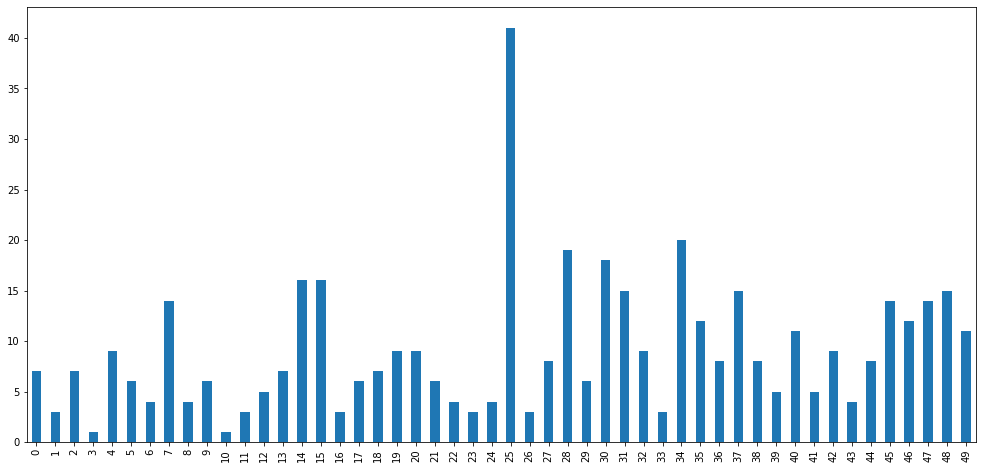

In [33]:
fig0 = plt.figure(figsize=(17,8))
clust_size = metro.loc[metro.index,'NumOfProp']
clust_size.plot(kind='bar')
#clust_size.set_title('Distance')
#clust_size.set_xlabel('Cluster No')
#clust_size.set_ylabel('Distance (km)')
#xticklabels=range(0,50)
#clust_size.set_xticklabels(xticklabels)
fig0.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


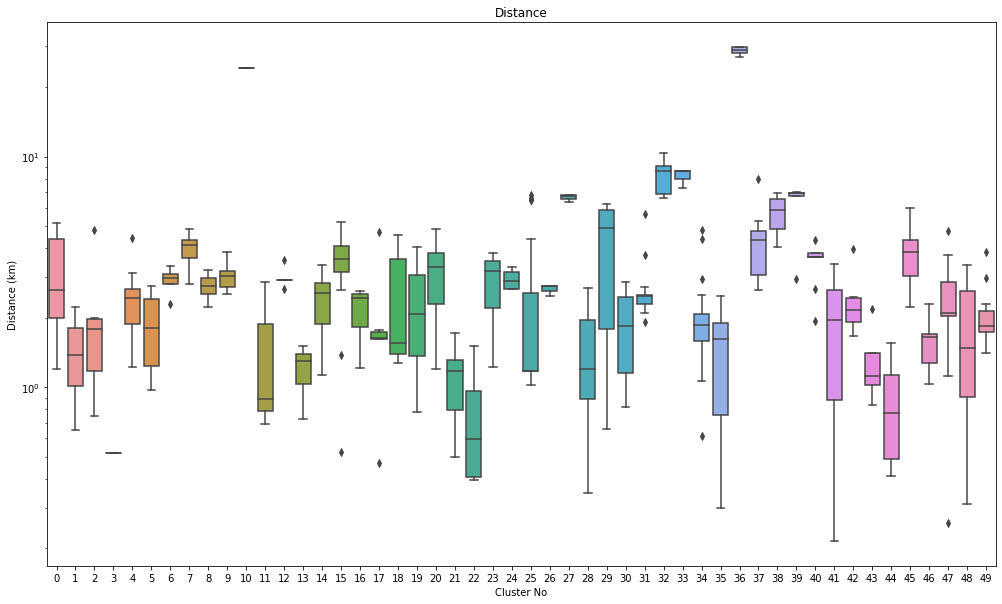

In [34]:
import seaborn as sns
fig1 = plt.figure(figsize=(17,10))
ax = sns.boxplot(data=metro['Distance'])
ax.set_title('Distance')
ax.set_xlabel('Cluster No')
ax.set_ylabel('Distance (km)')
xticklabels=range(0,50)
ax.set_xticklabels(xticklabels)
fig1.get_axes()[0].set_yscale('log')
fig1.show()

In [51]:
kclusters = 50
km2 = KMeans(n_clusters=kclusters, init='random', max_iter=100, n_init=100, verbose=1)
km2.fit(df_clean2[['lat','lng']])

Initialization complete
Iteration 0, inertia 0.33574922878696384
Iteration 1, inertia 0.1660477644002855
Iteration 2, inertia 0.13634611346023026
Iteration 3, inertia 0.12899414616977745
Iteration 4, inertia 0.1277615453947874
Iteration 5, inertia 0.12672015608409196
Iteration 6, inertia 0.12511294874771586
Iteration 7, inertia 0.12348315419690445
Iteration 8, inertia 0.12211720898674276
Iteration 9, inertia 0.12155484516233726
Iteration 10, inertia 0.12133146284752296
Iteration 11, inertia 0.12123567840844829
Iteration 12, inertia 0.12100244850845487
Converged at iteration 12: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.603887654969684
Iteration 1, inertia 0.195242107857149
Iteration 2, inertia 0.14928916178367607
Iteration 3, inertia 0.13906540997145664
Iteration 4, inertia 0.13586702292124464
Iteration 5, inertia 0.13339590710715246
Iteration 6, inertia 0.13226174013416747
Iteration 7, inertia 0.13144252903982828
Iteration 

Iteration 0, inertia 0.36121859315038324
Iteration 1, inertia 0.1786771701732567
Iteration 2, inertia 0.12091246406816784
Iteration 3, inertia 0.11379663228279208
Iteration 4, inertia 0.11061332614863571
Iteration 5, inertia 0.11010337961713802
Iteration 6, inertia 0.10987772441227421
Iteration 7, inertia 0.10968974323192045
Iteration 8, inertia 0.10960414145296357
Converged at iteration 8: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.4334352282163789
Iteration 1, inertia 0.29397920167815184
Iteration 2, inertia 0.2710401010743388
Iteration 3, inertia 0.251628299587532
Iteration 4, inertia 0.23423578882029833
Iteration 5, inertia 0.20893437137325127
Iteration 6, inertia 0.1750011391866375
Iteration 7, inertia 0.15685390992056075
Iteration 8, inertia 0.14946576414672605
Iteration 9, inertia 0.14337895838658524
Iteration 10, inertia 0.14299611338143428
Converged at iteration 10: center shift 0.0 within tolerance 1.173538229869600

Iteration 6, inertia 0.13111221510888432
Converged at iteration 6: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.6416367868426286
Iteration 1, inertia 0.2135566302159751
Iteration 2, inertia 0.15178285496288557
Iteration 3, inertia 0.13594024494383797
Iteration 4, inertia 0.13192122530112407
Iteration 5, inertia 0.12326716966031209
Iteration 6, inertia 0.12226092814504207
Iteration 7, inertia 0.12137662749910319
Iteration 8, inertia 0.12076445644822055
Iteration 9, inertia 0.1199784230541593
Converged at iteration 9: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.320411715255139
Iteration 1, inertia 0.1668579855796826
Iteration 2, inertia 0.13901273010604975
Iteration 3, inertia 0.12672346542707763
Iteration 4, inertia 0.12411248708074572
Iteration 5, inertia 0.1232979626626912
Converged at iteration 5: center shift 0.0 within tolerance 1.1735382298696006e-06
Initializatio

Iteration 1, inertia 0.21168784719976216
Iteration 2, inertia 0.17066159845026413
Iteration 3, inertia 0.15204668849727765
Iteration 4, inertia 0.1456560771361714
Iteration 5, inertia 0.1420798037606803
Iteration 6, inertia 0.14017866088259057
Iteration 7, inertia 0.13857398844994892
Converged at iteration 7: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.3903063865630821
Iteration 1, inertia 0.17693812847962417
Iteration 2, inertia 0.13124199719528068
Iteration 3, inertia 0.12215615455030955
Iteration 4, inertia 0.1178336433573491
Iteration 5, inertia 0.1141477248093828
Iteration 6, inertia 0.11206422455449518
Iteration 7, inertia 0.11042571036369377
Iteration 8, inertia 0.10918161110201556
Iteration 9, inertia 0.10864058074703355
Iteration 10, inertia 0.1085025712930585
Converged at iteration 10: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.40565639093015105
Iteration 1

Iteration 6, inertia 0.12863759062646998
Iteration 7, inertia 0.12858734403651662
Converged at iteration 7: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.41704032189466655
Iteration 1, inertia 0.16527836766707638
Iteration 2, inertia 0.13452948515206825
Iteration 3, inertia 0.12435419584669091
Iteration 4, inertia 0.12285153883545816
Iteration 5, inertia 0.12264306311100773
Iteration 6, inertia 0.12255393960774504
Converged at iteration 6: center shift 0.0 within tolerance 1.1735382298696006e-06
Initialization complete
Iteration 0, inertia 0.482216425315867
Iteration 1, inertia 0.1810985207067095
Iteration 2, inertia 0.1338002877636141
Iteration 3, inertia 0.11356056151949824
Iteration 4, inertia 0.10465802176382048
Iteration 5, inertia 0.10206188505127557
Iteration 6, inertia 0.1012247990037043
Iteration 7, inertia 0.10101932383256032
Converged at iteration 7: center shift 0.0 within tolerance 1.1735382298696006e-06
Initializat

Iteration 7, inertia 0.13482392160124904
Iteration 8, inertia 0.1343705396991552
Converged at iteration 8: center shift 0.0 within tolerance 1.1735382298696006e-06


KMeans(init='random', max_iter=100, n_clusters=50, n_init=100, verbose=1)

In [52]:
km2.labels_

array([30, 22,  7, 36, 28,  0, 22, 49, 10, 42,  1, 44, 22,  5, 15, 21, 22,
       49, 44, 42, 22, 28, 22, 30, 22, 22, 22, 22,  3, 44,  1, 19, 42, 17,
        9, 38, 38, 20, 20, 20, 38, 42, 11, 40,  3,  5, 34, 32,  5, 38, 38,
       11, 44, 28, 38, 42, 31, 14, 44, 21, 17,  5,  7, 41, 46, 42, 46,  1,
       14, 10, 46,  1, 46, 40, 19, 21, 33, 44,  1,  1,  1, 38, 49, 44, 27,
       24, 49, 49, 47, 23,  2, 33, 17, 14, 37, 37,  3, 32,  6, 37, 46,  6,
        3, 47, 21,  2, 47, 41, 48, 48, 24, 47, 48, 48, 47,  3,  2,  2,  2,
       38, 46, 36, 21,  0, 48, 45, 41, 38, 48, 23,  3, 38, 10,  3, 29, 37,
       37, 19, 24,  4, 28, 41, 23, 28,  3, 33, 47, 21, 17, 28, 15, 31, 24,
       37, 18, 47, 10, 37, 33, 39,  5, 38,  4, 17, 12, 24,  5,  5, 41, 40,
       30,  3, 12, 46, 13, 47,  3, 17, 11,  4, 47, 16, 32, 37, 29, 17, 36,
        3, 47,  0, 17,  4,  6, 48, 47, 24, 24,  3, 14, 13, 20, 47, 19, 47,
       48, 26, 24, 14, 11, 23, 40, 11, 31,  9, 48, 47, 12, 12, 24,  3, 40,
       32, 42, 42,  3, 26

In [54]:
df_clean2['class'] = km2.labels_

In [55]:
df_clean2

,global_id,MainFunctional,AdmArea,lng,lat,class
0,272726711,Многоэтажный многоквартирный дом,[Восточный административный округ],37.795564,55.761349,30
1,272726777,Многоэтажный многоквартирный дом,[Южный административный округ],37.662498,55.606339,22
2,272726846,Многоэтажный многоквартирный дом,[Южный административный округ],37.677880,55.642152,7
3,272726887,Многоэтажный многоквартирный дом,[Северный административный округ],37.500611,55.801861,36
4,272726890,Многоэтажный многоквартирный дом,[Северный административный округ],37.561879,55.879980,28
...,...,...,...,...,...,...
448,1035998832,Многоэтажный многоквартирный дом,[Южный административный округ],37.609482,55.673468,19
449,1037160508,Многоэтажный многоквартирный дом,[Северный административный округ],37.539290,55.840328,9
450,1037862689,Многоэтажный многоквартирный дом,[Северный административный округ],37.474834,55.859469,40
451,1037862798,Многоэтажный многоквартирный дом,[Северный административный округ],37.474834,55.859469,40


In [56]:
km2.inertia_

0.10101932383256032

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_clean2['lat'], df_clean2['lng'], df_clean2['class']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
# add markers to map
for i, lat, lng, name in zip(venues.index, venues['lat'], venues['lng'], venues['name']):
    label = '{}: {}'.format(i, name.split("(")[0])
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)             
        
map_clusters

In [63]:
#km2.cluster_centers_
metro2.drop(['NumOfProp','Distance'], axis=1)

,name,lat,lng
0,metro Kitay-gorod (Метро Китай-город),55.755196,37.633110
1,metro Park Pobedy (Метро Парк Победы),55.737146,37.515340
2,"metro Kiyevskaya, line 5 (Метро Киевская, коль...",55.743576,37.566194
3,"metro Komsomolskaya, line 5 (Метро Комсомольск...",55.775596,37.654834
4,metro Ploshchad Ilyicha (Метро Площадь Ильича),55.747179,37.681648
5,"metro Taganskaya, line 5 (Метро Таганская, кол...",55.742171,37.653771
6,metro Rimskaya (Метро Римская),55.746339,37.681594
7,metro Proletarskaya (Метро Пролетарская),55.731690,37.664911
8,metro Tsvetnoy Bulvar (Метро Цветной бульвар),55.771525,37.620784
9,metro Sokolniki (Метро Сокольники),55.789241,37.680353


In [71]:
# Find the closest metro station to the found cluster centroid
from scipy.spatial import distance

s1 = km2.cluster_centers_
s2 = metro2.loc[:,['lat','lng']].values
print(distance.cdist(s1,s2).min(axis=1))
s2



[0.07386479 0.03038521 0.01735795 0.03749888 0.03176342 0.03229643
 0.10623213 0.01450695 0.01911269 0.01599743 0.0247385  0.00184385
 0.08937635 0.0260965  0.0289094  0.02838115 0.05700621 0.00677258
 0.0196834  0.05059132 0.05541507 0.02876973 0.01952088 0.01446331
 0.02419781 0.03365898 0.07308471 0.02364988 0.02074088 0.03404148
 0.0133776  0.03266121 0.00846543 0.03544761 0.02486451 0.04133992
 0.00127629 0.02597901 0.01554271 0.01635537 0.01846058 0.08553977
 0.01867461 0.02315754 0.00639051 0.01126611 0.02578899 0.02079893
 0.03775763 0.00875533]


array([[55.755196  , 37.63311   ],
       [55.73714575, 37.5153401 ],
       [55.74357583, 37.56619443],
       [55.775596  , 37.654834  ],
       [55.74717935, 37.68164804],
       [55.7421714 , 37.6537708 ],
       [55.74633873, 37.68159376],
       [55.73169041, 37.66491138],
       [55.77152462, 37.62078425],
       [55.78924086, 37.68035333],
       [55.768659  , 37.64922   ],
       [55.77530925, 37.58266216],
       [55.77712194, 37.58249817],
       [55.731724  , 37.730158  ],
       [55.86431755, 37.60451248],
       [55.68773406, 37.57354259],
       [55.77355584, 37.546978  ],
       [55.81061913, 37.79887406],
       [55.78773333, 37.78158545],
       [55.80538846, 37.51500686],
       [55.83978349, 37.48691797],
       [55.74828493, 37.78095695],
       [55.76339617, 37.56209375],
       [55.70867829, 37.7317822 ],
       [55.78842224, 37.75067568],
       [55.65893   , 37.74961   ],
       [55.84621695, 37.58955002],
       [55.74476706, 37.86477063],
       [55.70626394,

In [ ]:
num = []
dist = []
for st in metro2.index:
    count = 0
    loc_dist = []
    for prop in df_clean2.index: #['class']:
        if st == df_clean2.loc[prop, 'class']:
            count+=1
            #print("{}:{}".format(metro.iloc[st,'lat'], df_clean.loc[st,'lat']))
            #print("{} {} {} {}".format(metro.loc[st,'lng'], metro.loc[st,'lat'], df_clean.loc[prop,'lng'], df_clean.loc[prop,'lat']))
            #loc_dist.append(haversine(metro.loc[st,'lng'], metro.loc[st,'lat'], df_clean.loc[st,'lng'], df_clean.loc[st,'lat']))
            #metro.loc[st,'lat']-df_clean.loc[st,'lat'])
            mtr = [metro2.loc[st,'lat'], metro2.loc[st,'lng']]
            pty = [df_clean2.loc[prop,'lat'], df_clean2.loc[prop,'lng']]
            mtr_rad = [radians(_) for _ in mtr]
            pty_rad = [radians(_) for _ in pty]
            result = haversine_distances([mtr_rad, pty_rad])[0,1]
            loc_dist.append(result*6371000/1000)
    
    num.append(count)
    dist.append(loc_dist)
#print(num)
#print(dist)
metro2['NumOfProp'] = num
metro2['Distance'] = dist